In [21]:
import keras
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
from PIL import Image
import joblib

In [24]:
label_encoder = joblib.load("/label_encoders")

FileNotFoundError: [Errno 2] No such file or directory: '/label_encoders'

In [7]:
# image folder
folder_path = '../Project_4/10_test'
# path to model
model_path = '../Project_4/optimized_model.h5'
# dimensions of images
img_width, img_height = 320, 240

# load the trained model
model = keras.models.load_model('optimized_model.h5')


# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    resized_array = cv2.resize(array,(320,240),interpolation=cv2.INTER_AREA)
    resized_array_rgb = cv2.cvtColor(resized_array,cv2.COLOR_GRAY2RGB)
    image_array = np.array(resized_array_rgb).reshape(-1, 240, 320, 3)
    images.append(image_array)

# stack up images list to pass for prediction
images = np.vstack(images)
#classes = model.predict_classes(images)
classes = np.argmax(model.predict(images), axis=-1)
print(classes)


[ 8  8 10  4  4 25 21 32 34 38]


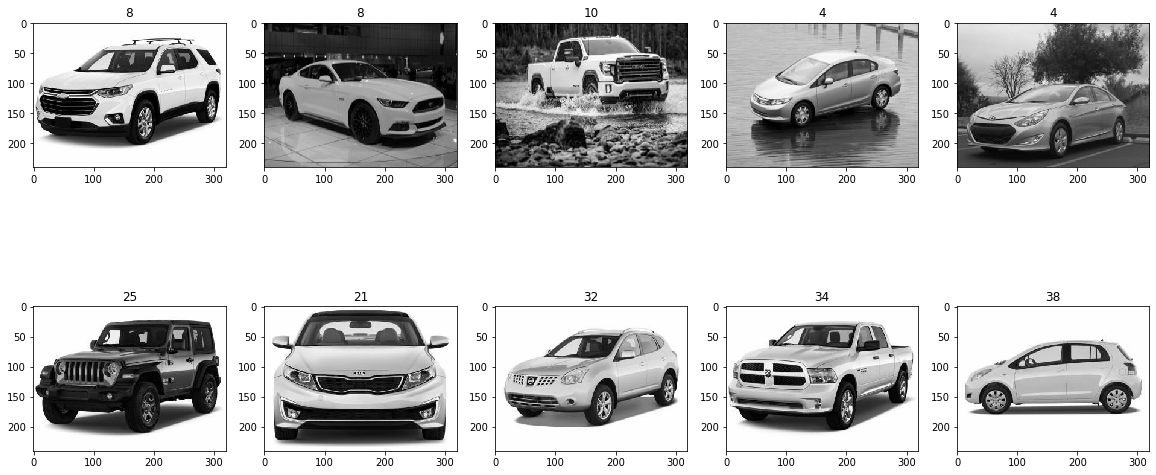

In [4]:
fig = plt.figure(figsize=(20, 20))
for i,img in enumerate(images):
    fig.add_subplot(4,5, i+1)
    plt.title(classes[i])
    plt.imshow(img/256.)
plt.show()

In [5]:
predictions = model.predict(images)
probability = np.amax(predictions)
print(f'Car Model: {classes} , Prediction: {predictions}, Probability: {probability}')

Car Model: [ 8  8 10  4  4 25 21 32 34 38] , Prediction: [[2.28459243e-08 4.87630249e-12 7.00310120e-05 2.09318399e-02
  2.20840884e-04 7.20520310e-10 4.05098399e-04 1.81705374e-02
  8.38978112e-01 8.65290133e-08 8.01753330e-09 8.14924533e-07
  1.05926009e-18 1.43804459e-03 7.52056167e-02 1.30376006e-14
  2.80378922e-03 1.30817003e-03 1.08630854e-06 2.20635940e-07
  7.78260073e-05 1.77952519e-03 2.99881431e-09 1.13035739e-07
  6.52933568e-06 2.05732317e-06 6.80791773e-03 6.34903425e-13
  4.30937653e-04 4.48153559e-09 3.07324299e-05 1.93759229e-06
  1.39887501e-02 5.99277299e-03 3.36532437e-08 7.43283202e-13
  1.45310230e-04 4.38351947e-07 9.96620953e-03 4.32572706e-04
  8.02200462e-04 1.98846885e-12]
 [8.58464686e-04 1.37126926e-05 1.73533001e-04 8.48001800e-03
  1.33794129e-01 2.80149379e-06 3.43438442e-04 6.84337970e-03
  4.34760302e-01 4.42478311e-04 6.92972171e-05 2.48701632e-04
  9.04909037e-09 7.71725327e-02 1.66364084e-03 7.84457665e-10
  1.39127210e-01 1.77841727e-03 3.07836407

In [11]:
predictions[0]

array([2.2845924e-08, 4.8763025e-12, 7.0031012e-05, 2.0931840e-02,
       2.2084088e-04, 7.2052031e-10, 4.0509840e-04, 1.8170537e-02,
       8.3897811e-01, 8.6529013e-08, 8.0175333e-09, 8.1492453e-07,
       1.0592601e-18, 1.4380446e-03, 7.5205617e-02, 1.3037601e-14,
       2.8037892e-03, 1.3081700e-03, 1.0863085e-06, 2.2063594e-07,
       7.7826007e-05, 1.7795252e-03, 2.9988143e-09, 1.1303574e-07,
       6.5293357e-06, 2.0573232e-06, 6.8079177e-03, 6.3490343e-13,
       4.3093765e-04, 4.4815356e-09, 3.0732430e-05, 1.9375923e-06,
       1.3988750e-02, 5.9927730e-03, 3.3653244e-08, 7.4328320e-13,
       1.4531023e-04, 4.3835195e-07, 9.9662095e-03, 4.3257271e-04,
       8.0220046e-04, 1.9884689e-12], dtype=float32)

In [12]:
#Sort the predictions from least to greatest
#highest probability is at index=9 and the lowest probability is at index = 0.
for i,img in enumerate(images):
    list_index = [0,1,2,3,4,5,6,7,8,9]
    x = predictions
    for i in range(10):
        for j in range(10):
            if x[0][list_index[i]] > x[0][list_index[j]]:
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[8, 3, 7, 6, 4, 2, 9, 0, 5, 1]


In [13]:
#Print the first 5 most likely classes and the corresponding probability.
for i in range(5):
    print(classes[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

34 : 83.9 %
4 : 2.09 %
32 : 1.82 %
21 : 0.04 %
4 : 0.02 %
